<a href="https://colab.research.google.com/github/anamaria1-4/GitHub-Finanzas_-Computacionales/blob/main/Taller_2_Sarah_T%C3%A9llez%2C_Daniel_Jorge_%26_Ana_Mar%C3%ADa_Rojas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.uexternado.edu.co/wp-content/uploads/2020/07/logo-uec.png" width="180" height="80"> 

<center>

<br><br>

<b>Taller 2</b>
<div style="font-size:175%;color:write; background-color: #0064b0;">Pregrado en Finanzas y Relaciones Internacionales</div>
<div style="font-size:175%;color:white; background-color: #0064b0;">Finanzas Computacionales</div>
<div style="font-size:175%;color:white; background-color: #0064b0;">Profesor: Carlos Andrés Zapata Quimbayo</div>
<div style="font-size:250%;color:white; background-color: #0064b0;">Estudiantes: Sarah Téllez, Daniel Steven Jorge Cardona y Ana María Rojas Giraldo</div>
<div style="font-size:175%;color:white; background-color: #0064b0;">2022</div> 
</center>

* Se importan las librerias necesarias.

In [ ]:
import warnings 
import numpy as np
import cvxpy as cp
!pip install yfinance
import yfinance as yf
import cvxopt as cvxop
import scipy.stats
import pandas as pd
from scipy import stats 
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from scipy.optimize import minimize
from matplotlib.patches import Polygon
from numpy.core.function_base import linspace
from sklearn.linear_model import LinearRegression

# Punto 1

### Dibujar la región factible el siguiente problema de programación lineal (LP) con dos variables:

$$ \max    2 x_1 - x_2 $$
$$  x_1 + x_2 \geq 1 $$
$$ x_1 - x_2 \leq 0 $$
$$ 3x_1 + x_2 \leq 6 $$
$$ x_1, x_2 \geq 0 $$

#### Región Factible

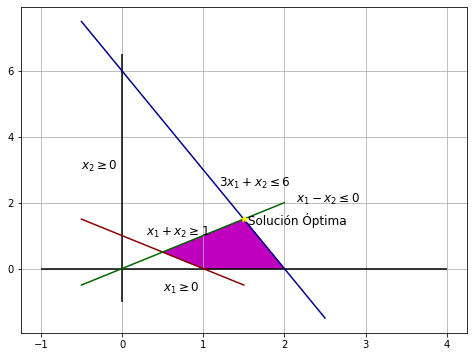

In [2]:
#@Región Factible
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
# Draw constraint lines
ax.hlines(0, -1, 4)
ax.vlines(0, -1, 6.5)
ax.plot(np.linspace(-0.5, 1.5, 100), 1-1*np.linspace(-0.5, 1.5, 100), color="darkred")
ax.plot(np.linspace(-0.5, 2.5, 100), 6-3*np.linspace(-0.5, 2.5, 100), color="darkblue")
ax.plot(np.linspace(-0.5, 2, 100), 1*np.linspace(-0.5, 2, 100), color="darkgreen")
ax.text(0.3,1,"$  x_1 + x_2 \geq 1 $",size=12)
ax.text(2.14,2,"$  x_1 - x_2 \leq 0 $",size=12)
ax.text(1.2,2.5,"$ 3 x_1 + x_2 \leq 6 $",size=12)
ax.text(-0.5,3,"$x_2\geq 0$",size=12)
ax.text(0.5,-0.7,"$x_1\geq 0$",size=12)
#Draw the feasible region
feasible_set=Polygon(np.array([[0.5,0.5],
                               [1.5,1.5],
                               [2,0],
                               [1,0]]),
                     color="m")
ax.add_patch(feasible_set)

# Draw the optimal solution
ax.plot(1.5, 1.5, "*", color="yellow")
ax.text(1.55, 1.35, "Solución Óptima", size=12)

plt.show()

Se observa en color magenta la región factible del problema de desigualdades. Así mismo, se puede contemplar la solución óptima del problema, el cual es un punto factible que alcanza el mejor valor objetivo posible.

# Punto 2


#### Restricciones

$$ 0.5 x_1 + 0.3x_2 + 0.25x_3 + 0.6x_4 \geq 0.35 * (80) (Cap. Grande)$$ 
$$ 0.3 x_1 + 0.1x_2 + 0.4x_3 + 0.2x_4 \geq 0.30 * (80) (Cap. Mediana)$$
$$ 0.2 x_1 + 0.6 x_2 + 0.35x_3 + 0.2x_4 \geq 0.15 * (80) (Cap. Pequeña)$$

In [3]:
c=np.array([0.1,0.15,0.16,0.08]) #Retorno Esperado 
A=np.array ([[1,1,1,1]]) # Cuatro unos, porque son cuatro fondos
b=np.array([80])

#### Restricciones de Desigualdades

In [4]:
#Restricciones de Desigualdades. 
D=np.array([[0.5,0.3,0.25,0.6],
            [0.3,0.1,0.4,0.2],
            [0.2,0.6,0.35,0.2]]) 

#### Resultados de la Restricción de Desigualdad

In [5]:
d=np.array([28,24,12])

resultado=linprog(-c,A_ub=-D,b_ub=-d,A_eq=A,b_eq=b,method='simplex') #c negativo por maximizar 
resultado

     con: array([0.])
     fun: -10.989473684210527
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([-3.55271368e-15, -3.55271368e-15,  1.60000000e+01])
  status: 0
 success: True
       x: array([ 0.        , 12.63157895, 46.31578947, 21.05263158])

In [6]:
#En CVXPY
# Construct the problem.
n = 4
x = cp.Variable(n)
objective = cp.Maximize(c.T @ x )
constraints = [A @ x == b,D@ x >= d,x>=0] #vectores. Escalar=cp.sum
prob = cp.Problem(objective, constraints)

#### Valor Objetivo Óptimo

In [7]:
result = prob.solve()
result

10.9894736825593

#### Pesos óptimos para la inversión

In [8]:
round(pd.DataFrame(x.value),4)

,0
0,0.0000
1,12.6316
2,46.3158
3,21.0526


Si se desea invertir 80 millones en cuatro fondos, la asignación factible para cada fondo con el retorno esperado más alto es: 

* **Fondo 1:** la mejor opción es no invertir nada en este fondo, ya que genera una reducción del -0.0026 en la rentabilidad de la inversión, es decir, no generaría una rentabilidad sino una pérdida. 
* **Fondo 2:** la mejor opción es invertir 12.63157895 millones en este fondo.
* **Fondo 3:** la mejor opción es invertir 46.31578947 millones. Este es el fondo que mayor pesos tiene en la inversión, ya que generá mayor rentabilidad a menor o igual riesgo que los demás.
* **Fondo 4:** la mejor opción es invertir 21.05263158 millones.
Además, también se puede observar el valor objetivo óptimo de la inversión: 10.98947. 

# Punto 3


In [9]:
b=np.array([150,100,-200,200,-50,-300]) #cambio de signo al cambiar de lado. 
c=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1]) #Función objetivo 
rx= np.array([1.01])#tasa interés crédito
ry= np.array([1.02])#tasa interés bono
rz= np.array([1.003])#tasa rentabilidad
A=np.array([[1,0,0,0,0, 1,0,0, -1,0,0,0,0,0],
            [-rx,1,0,0,0, 0,1,0, rz,-1,0,0,0,0],
            [0,-rx,1,0,0, 0,0,1, 0,rz,-1,0,0,0],
            [0,0,-rx,1,0, -ry,0,0, 0,0,rz,-1,0,0],
            [0,0,0,-rx,1, 0,-ry,0, 0,0,0,rz,-1,0],
            [0,0,0,0,-rx, 0,0,-ry, 0,0,0,0,rz,-1]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


#### Solución CVXPY

In [10]:
n = len(c)
x = cp.Variable(n) 
objective = cp.Maximize(c.T @ x )
constraints = [A @ x == b,x>=0] 
prob = cp.Problem(objective, constraints)

#### Valor Objetivo Óptimo

In [11]:
result = prob.solve()
result

92.49694913323782

#### Solución 

In [12]:
sol=round(pd.DataFrame(x.value),6)
sol

,0
0,0.000001
1,42.686747
2,0.000000
3,0.000000
4,8.459517
5,150.000000
6,57.313253
7,195.057783
8,0.000001
9,0.000000


#### Linprog

In [13]:
c=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1]) #Retorno esperado 
rx= np.array([1.01])# Tasa interés crédito
ry= np.array([1.02])# Tasa interés bono
rz= np.array([1.003])# Tasa rentabilidad
A=np.array([[1,0,0,0,0, 1,0,0, -1,0,0,0,0,0],
            [-rx,1,0,0,0, 0,1,0, rz,-1,0,0,0,0],
            [0,-rx,1,0,0, 0,0,1, 0,rz,-1,0,0,0],
            [0,0,-rx,1,0, -ry,0,0, 0,0,rz,-1,0,0],
            [0,0,0,-rx,1, 0,-ry,0, 0,0,0,rz,-1,0],
            [0,0,0,0,-rx, 0,0,-ry, 0,0,0,0,rz,-1]]) 
b=np.array([150,100,-200,200,-50,-300])


resultado=linprog(-c,A_eq=A,b_eq=b,method='revised simplex') #c negativo por maximizar 
resultado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


     con: array([ 2.84217094e-14, -1.42108547e-14, -5.68434189e-14,  2.84217094e-14,
        0.00000000e+00,  0.00000000e+00])
     fun: -92.49694915254233
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([  0.        ,  50.98039216,   0.        ,   0.        ,
         0.        , 150.        ,  49.01960784, 203.43436358,
         0.        ,   0.        , 351.9441675 ,   0.        ,
         0.        ,  92.49694915])

La empresa XYZ puede alcanzar una riqueza óptima de **92.4969** en Junio. Para que la compañia pueda llegar a esta cifra deberá emitir papeles comercial (bonos) por un valor en **150.000** para el mes de Enero. Así mismo, es necesario que también se realicen en Febrero y Marzo por un valor de **57.3132** y **195.0577** para cada mes respectivamente. Además, se tendrá que sacar **42.6867** de la línea de crédito en Febrero y en Mayo **8.4595**. Por otro lado, el exceso de efetivo de Marzo **(351.944)** se podrá invertir durante un mes; para el mes de Mayo se paga el crédito y es así como para el mes de Junio la empresa lograría solucionar su problema de financiación y alcanzar el capital óptimo. Es importante acotar que, hay diferentes maneras de solucionar el problema mediante créditos y bonos en diferentes meses y con diferentes valores para así alcanzar el objetivo. No obstante, todas llegan a la misma solución óptima como se observa con linprog y el archivo de excel.



# Punto 4

#### Información histórica de General Motors (Precios y retornos)

In [21]:
fechainicial = "2015-12-01"
fechafinal = "2020-12-31"
periodicidad = "1Mo"
gm = ["GM"]
p_gm = yf.download(gm,start=fechainicial ,end=fechafinal,interval=periodicidad)['Adj Close'].dropna()
r_gm = np.log(p_gm/p_gm.shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed


General Motors Company es una compañía estadounidense que fabrica automóviles, camiones y motores.

#### Variables explicativas del activo (Standard & Poor's 500 y S&P Metals & Mining Select Industry Index)

In [22]:
# Standard & Poor's 500
sp_500 = yf.download("^GSPC",start=fechainicial,end=fechafinal,interval=periodicidad)['Adj Close'].dropna()
r_sp_500 = np.log(sp_500/sp_500.shift(1)).dropna()
r_sp_500.shape

#S&P Metals & Mining Select Industry Index
sp_mm = yf.download("XME",start=fechainicial,end=fechafinal,interval=periodicidad)['Adj Close'].dropna()
r_sp_mm = np.log(sp_mm/sp_mm.shift(1)).dropna()
r_sp_mm.shape

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(60,)

*   **Standard & Poor's 500:** El índice se basa en la capitalización bursátil de 500 grandes empresas que poseen acciones que cotizan en las bolsas NYSE o NASDAQ, y captura aproximadamente el 80% de toda la capitalización de mercado en Estados Unidos. Se considera como el índice más representativo de la situación real del mercado.
*   **S&P Metals & Mining Select Industry Index:** Este indice representa el segmento de metales y minería del S&P Total Market Index (“S&P TMI”). El S&P TMI está diseñado para rastrear el amplio mercado de acciones de EE. UU. El segmento de metales y minería del S&P TMI comprende las siguientes subindustrias: aluminio, carbón y combustibles consumibles, cobre, metales diversificados y minería, oro, metales y minerales preciosos, plata y acero.

#### Beta y alpha de General Motor y Standard & Poor's 500 

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(pd.DataFrame(r_sp_500), pd.DataFrame(r_gm))
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = [-0.00868232]
betas = [[1.50455399]]


Se obtuvo un alfa de -0.00868. Este es el retorno mensual constante que ofrece Generar Motor con respecto al Standard & Poor's 500, por lo cual Generar se considera un activo subvaluado. 

Se obtuvo una beta de 1.50455. La beta al ser mayor a 1, significa que Generar Motor en promedio es más riesgoso que los activos que se encuentran en el Standard & Poor's 500, esto lo cataloga un activo agresivo. Como la beta es mayor a 1 el retorno de este activo tiene que ser mayor al retorno del Standard & Poor's 500. Por lo tanto, una variación del Standard & Poor's 500 provoca una variación mayor en Generar Motor. Sin embargo, lo anterior es favorable cuando el mercado está en etapa de crecimiento más no cuando está en etapa de recesión, por eso este activo posee un mayor riesgo sistemático.

#### Beta y alpha de General Motor y S&P Metals & Mining Select Industry Index

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(pd.DataFrame(r_sp_mm), pd.DataFrame(r_gm))
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = [-0.00252528]
betas = [[0.60934894]]


Se obtuvo un alfa de -0.00252. Este es el retorno mensual constante que ofrece Generar Motor con respecto al S&P Metals & Mining Select Industry Index, por lo cual Generar se considera un activo subvaluado. 

Se obtuvo una beta de 0.60934. La beta al ser menor a 1, significa que Generar Motor en promedio es menos riesgoso que los activos que se encuentran en el S&P Metals & Mining Select Industry Index, esto lo cataloga un no activo agresivo. Por lo tanto, una variación del S&P Metals & Mining Select Industry Index provoca una variación menor en Generar Motor. Lo anterior indica que dicho activo varía menos que el mercado en su conjunto, por eso este activo posee un menor riesgo sistemático.

### Objetivo que la operación matricial sea igual a la estimación de los betas (Usando Standard & Poor's 500 y S&P Metals & Mining Select Industry Index)

In [25]:
indices = yf.download(["^GSPC","XME"],start=fechainicial,end=fechafinal,interval=periodicidad)['Adj Close'].dropna()
r_indices = np.log(indices/indices.shift(1)).dropna()
r_indices.shape

[*********************100%***********************]  2 of 2 completed


(60, 2)

#### Operación matricial:

In [26]:
t = len(r_indices)
unos = pd.DataFrame(np.repeat(1,t))
r_indices2 = pd.DataFrame(r_indices)
r_gm2 = pd.DataFrame(r_gm)
variables = np.concatenate((unos,r_indices2),1)
X = variables.T @ variables
Xy = variables.T @ r_gm
Sol= np.linalg.solve(X,Xy)
Sol

array([-0.00802702,  0.31310156,  0.97880491])

#### Estimación de los betas con SkLearn:

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(pd.DataFrame(r_indices), pd.DataFrame(r_gm))
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = [-0.00802702]
betas = [[0.31310156 0.97880491]]


El alfa es el componente anormal de retorno que no está siendo explicado por el modelo del mercado (modelo CAPM). Se obtuvo un alfa de -0.00802. Este es el retorno mensual constante que ofrece Generar Motor con respecto al Standard & Poor's 500 y S&P Metals & Mining Select Industry Index, por lo tanto, Generar Motor obtuvo un rendimiento por debajo del esperado.

Al tener un alfa negativo Generar Motor se considera un activo subvaluado, por lo tanto se puede implantar una estrategia de inversión que consiste en buscar acciones subvaluadas, ya que es posible adquirir esta acción por un costo relativamente bajo, con la finalidad de conseguir un mayor beneficio a futuro (estrategia de inversión Warren Buffett).

Además, se obtuvo unas betas de 0.31310 y 0.97880. Una beta que es menor 1 significa que Generar Motor en promedio es menos riesgoso que los activos que se encuentran en el Standard & Poor's 500 y el S&P Metals & Mining Select Industry Index, por lo tanto, es un activo no agresivo. Es decir, una variación del Standard & Poor's 500 o el S&P Metals & Mining Select Industry Index provoca una variación menor a Generar Motor. Lo anterior indica que dicho activo varía menos que el mercado en su conjunto, por eso este activo posee un menor riesgo sistemático. 

# Punto 5

#### Solución CVXPY

In [31]:
b=np.array([100,200,800,100,800,1200])
c=np.array([109, 94.8, 99.5, 93.1, 97.2, 92.9, 110, 104, 102, 95.2,0,0,0,0,0,0])
A = np.array([[10, 7, 8, 6, 7, 5, 10, 8, 7, 100, -1, 0, 0, 0, 0, 0],
[10, 7, 8, 6, 7, 5, 10, 8, 107, 0, 1, -1, 0, 0, 0, 0],
[10, 7, 8, 6, 7, 5, 110, 108, 0, 0, 0, 1, -1, 0, 0, 0],
[10, 7, 8, 6, 7, 105, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0],
[10, 7, 8, 106, 107, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0],
[110, 107, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1]])

n = len(c)
x = cp.Variable(n)

objective = cp.Minimize(c.T @ x )
constraints = [A @ x >=b,x>=0] 
prob = cp.Problem(objective, constraints)

#### Valor Objetivo Óptimo

In [32]:
result = prob.solve()

#### Solución 

In [33]:
sol=round(pd.DataFrame(x.value),6)
sol

,0
0,0.000000
1,11.214953
2,0.000000
3,6.633845
4,0.000001
5,0.000000
6,0.000000
7,6.008683
8,0.000000
9,0.000000


El flujo de pasivos equivale a una suma global de efectivo hoy igual a su valor actual, obtenido descontando las obligaciones futuras. En este caso, para que el fondo de pensiones pueda conseguir los flujos de efectivo suficientes para cubrir los requerimientos de algunos de los pasivos de los próximos 6 años es necesario hallar un portafolio óptimo. Por lo tanto, podemos observar los valores a invertir en los bonos del gobierno:

* **Bono 2:** para este bono se deben invertir 11.2149
* **Bono 4:** para este bono se deben invertir 6.6338
* **Bono 8:** para este bono se deben invertir 6.0086

La inversión en estos 10 bonos generá un costo de 2.381,13; el objetivo es minimizar el valor a invertir, ya que entre menor sea el valor del costo es mejor para el fondo. No obstante, este costo que tiene que asumir el fondo de pensiones es alto. Por otro lado, se puede observar que:
* Para el primer año el fondo obtuvo un excendente de efectivo de 66.3772, el cual se puede tranferir de este año al segundo año sin generar intereses. 
* Para el segundo año el fondo tuvo un excedente de efectivo de 32.7544. No obstante, para el año tres no existió un exdente de efectivo, pero el cuarto año el fondo de pensiones si obtuvo un excedente de 18.3077.

Por último, el anterior portafolio se puede confirmar con el archivo de excel realizado. 
 


